In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
#importing vision dependencias from fastai
from fastai.vision import *

In [0]:
mnist = untar_data(URLs.MNIST)
tfms = get_transforms(do_flip=False)

In [3]:
#mnist = untar_data(URLs.MNIST_TINY)
#tfms = get_transforms(do_flip=False)
mnist.ls()

[PosixPath('/root/.fastai/data/mnist_png/testing'),
 PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/models')]

In [0]:
data = (ImageList.from_folder(mnist) 
        .random_split_by_pct() 
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch())
        #.normalize()

In [0]:
print(data.classes)
data

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


ImageDataBunch;

Train: LabelList (56000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
2,2,2,2,2
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (14000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
6,8,9,8,4
Path: /root/.fastai/data/mnist_png;

Test: None

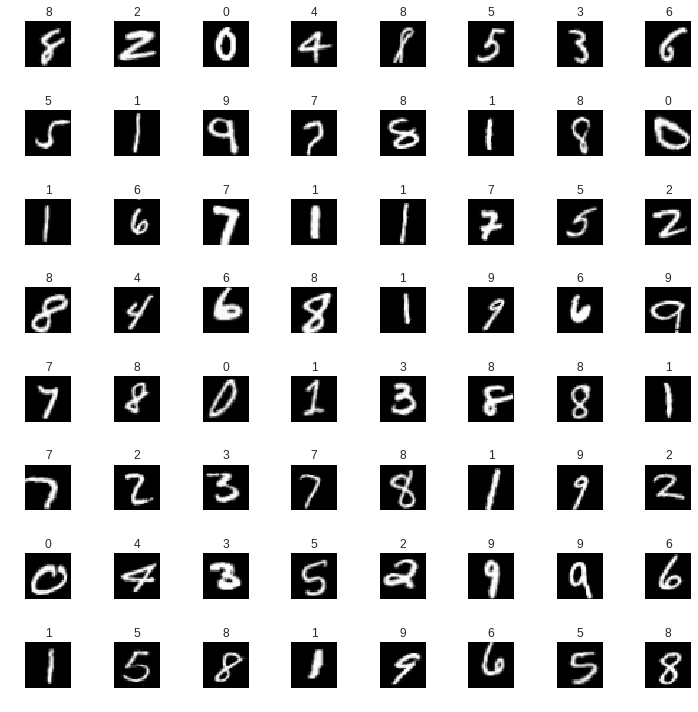

In [5]:
data.show_batch(rows=10, figsize=(10,10))

In [0]:
learn = create_cnn(data, models.resnet18, metrics=accuracy, ps=0, wd=0)

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


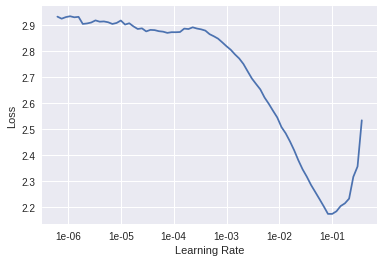

In [11]:
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(40, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.274025,0.154817,0.952071,01:46
2,0.148967,0.077991,0.975286,01:45
3,0.113838,0.058414,0.981786,01:46
4,0.104016,0.054188,0.982929,01:45
5,0.073598,0.047449,0.985571,01:44
6,0.086493,0.043789,0.986214,01:46
7,0.074312,0.044926,0.985429,01:46
8,0.073109,0.046848,0.985214,01:45
9,0.076036,0.037477,0.987643,02:02
10,0.069934,0.049549,0.984429,02:01


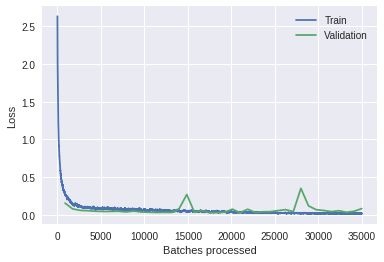

In [9]:
learn.save('train_1')
learn.recorder.plot_losses()

In [0]:
learn.export()